PROBLEM 1 (1% NOISE)

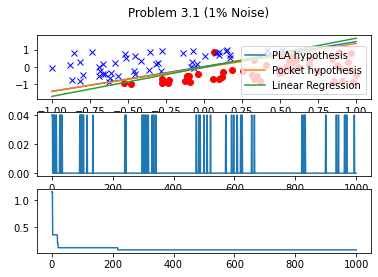

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#Pocket perceptron training function
def pocket_train(X, Y, w):
    f_list = []
    e_in_list = []
    best_val = 100

    f = np.random.uniform(-1, 1, size = (d + 1))


    for i in range(1000):
        adjust_index = []
        e_in_sum = 0

        Z = np.sign(np.dot(X,f))
        for j in range(len(X)):
            if Y[j] != Z[j]:
                adjust_index.append(j)
                e_in_sum += ((Z[j] - Y[j]) ** 2)
        e_in = e_in_sum / 100

        if i == 0:
            best_val = e_in
            best_index = 0

        f_list.append(f)
        e_in_list.append(best_val)
        f = f + np.dot(X[adjust_index[0],:], Y[adjust_index[0]])

        if e_in < best_val:
            best_val = e_in
            best_index = i

    return(f_list[best_index], e_in_list)


#Linear perceptron training function
def pla_train(X, Y, w):

    e_in_list = []
    e_in_sum = 0
    f = np.random.uniform(-1, 1, size = (d + 1))

    for i in range(1000):
        e_in_sum = 0
        e_in = 0
        Z = np.sign(np.dot(X,f))

        j = np.random.randint(0, 100, 1)
        if Y[j[0]] != Z[j[0]]:
            e_in_sum += ((Z[j[0]] - Y[j[0]]) ** 2)
            e_in = e_in_sum / 100
            f = f + np.dot(X[j[0],:], Y[j[0]])


        e_in_list.append(e_in)

    return (f, e_in_list)

#Starter Code from HW1
N = 100
d = 2

fig, axs = plt.subplots(3)

#Generate random target function: f(x) = w^Tx
w = np.random.uniform(-1, 1, size = (d + 1))

# Generate random training data
X = np.random.uniform(-1, 1, size = (N, d+1))
X[:,0] = 1

#Compute true labels for the training data
Y = np.sign(np.dot(X,w))

#Pick one random point and subvert its value (noise)
rand_index = np.random.randint(0, 100, 1)
Y[rand_index[0]] = Y[rand_index[0]] * -1

ind_pos = np.where(Y==1)[0] #positive examples
ind_neg = np.where(Y==-1)[0] #negative examples

#Plot points
axs[0].plot(X[ind_pos, 1], X[ind_pos, 2], 'ro')
axs[0].plot(X[ind_neg, 1], X[ind_neg, 2], 'bx')

#Run PLA 1000 times
pocket_result = pocket_train(X, Y, w)
pla_result = pla_train(X, Y, w)

f = pla_result[0]
f2 = pocket_result[0]
e_in_list = pla_result[1]
e_in_list2 = pocket_result[1]


x = np.linspace(-1, 1, 100)
f_y = -(f[0]/f[2]) + (-(f[1] * x)/f[2])
f_y2 = -(f2[0]/f2[2]) + (-(f2[1] * x)/f2[2])
axs[0].plot(x, f_y, label='PLA hypothesis')
axs[0].plot(x, f_y2, label='Pocket hypothesis')


#Plot specs
fig.suptitle('Problem 3.1 (1% Noise)')

e_in_x = np.linspace(0, 1000, 1000)
axs[1].plot(e_in_x, e_in_list)
axs[2].plot(e_in_x, e_in_list2)

Xdag = np.matmul(np.linalg.pinv(np.matmul(X.transpose(), X)), X.transpose())
f3 = np.matmul(Xdag, Y)
f_y3 = -(f3[0]/f3[2]) + (-(f3[1] * x)/f3[2])
axs[0].plot(x, f_y3, label='Linear Regression')

axs[0].legend()
plt.show()

PROBLEM 1 (5% NOISE)

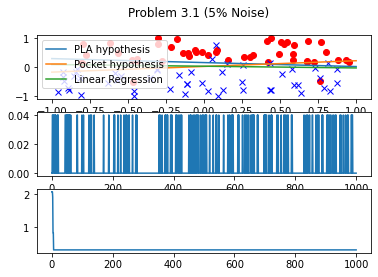

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Pocket perceptron training function
def pocket_train(X, Y, w):
    f_list = []
    e_in_list = []
    best_val = 100

    f = np.random.uniform(-1, 1, size = (d + 1))


    for i in range(1000):
        adjust_index = []
        e_in_sum = 0

        Z = np.sign(np.dot(X,f))
        for j in range(len(X)):
            if Y[j] != Z[j]:
                adjust_index.append(j)
                e_in_sum += ((Z[j] - Y[j]) ** 2)
        e_in = e_in_sum / 100

        if i == 0:
            best_val = e_in
            best_index = 0

        f_list.append(f)
        e_in_list.append(best_val)
        f = f + np.dot(X[adjust_index[0],:], Y[adjust_index[0]])

        if e_in < best_val:
            best_val = e_in
            best_index = i

    return(f_list[best_index], e_in_list)


#Linear perceptron training function
def pla_train(X, Y, w):

    e_in_list = []
    e_in_sum = 0
    f = np.random.uniform(-1, 1, size = (d + 1))

    for i in range(1000):
        e_in_sum = 0
        e_in = 0
        Z = np.sign(np.dot(X,f))

        j = np.random.randint(0, 100, 1)
        if Y[j[0]] != Z[j[0]]:
            e_in_sum += ((Z[j[0]] - Y[j[0]]) ** 2)
            e_in = e_in_sum / 100
            f = f + np.dot(X[j[0],:], Y[j[0]])


        e_in_list.append(e_in)

    return (f, e_in_list)

#Starter Code from HW1
N = 100
d = 2

fig, axs = plt.subplots(3)

#Generate random target function: f(x) = w^Tx
w = np.random.uniform(-1, 1, size = (d + 1))

# Generate random training data
X = np.random.uniform(-1, 1, size = (N, d+1))
X[:,0] = 1

#Compute true labels for the training data
Y = np.sign(np.dot(X,w))

#Pick five random points and subvert their values (noise)
rand_index = np.random.randint(0, 100, 5)
Y[rand_index[0]] = Y[rand_index[0]] * -1
Y[rand_index[1]] = Y[rand_index[1]] * -1
Y[rand_index[2]] = Y[rand_index[2]] * -1
Y[rand_index[3]] = Y[rand_index[3]] * -1
Y[rand_index[4]] = Y[rand_index[4]] * -1

ind_pos = np.where(Y==1)[0] #positive examples
ind_neg = np.where(Y==-1)[0] #negative examples

#Plot points
axs[0].plot(X[ind_pos, 1], X[ind_pos, 2], 'ro')
axs[0].plot(X[ind_neg, 1], X[ind_neg, 2], 'bx')

#Run PLA 1000 times
pocket_result = pocket_train(X, Y, w)
pla_result = pla_train(X, Y, w)

f = pla_result[0]
f2 = pocket_result[0]
e_in_list = pla_result[1]
e_in_list2 = pocket_result[1]


x = np.linspace(-1, 1, 100)
f_y = -(f[0]/f[2]) + (-(f[1] * x)/f[2])
f_y2 = -(f2[0]/f2[2]) + (-(f2[1] * x)/f2[2])
axs[0].plot(x, f_y, label='PLA hypothesis')
axs[0].plot(x, f_y2, label='Pocket hypothesis')

#Plot specs
fig.suptitle('Problem 3.1 (5% Noise)')

e_in_x = np.linspace(0, 1000, 1000)
axs[1].plot(e_in_x, e_in_list)
axs[2].plot(e_in_x, e_in_list2)

Xdag = np.matmul(np.linalg.pinv(np.matmul(X.transpose(), X)), X.transpose())
f3 = np.matmul(Xdag, Y)
f_y3 = -(f3[0]/f3[2]) + (-(f3[1] * x)/f3[2])
axs[0].plot(x, f_y3, label='Linear Regression')

axs[0].legend()
plt.show()

PROBLEM 1 (10% NOISE):

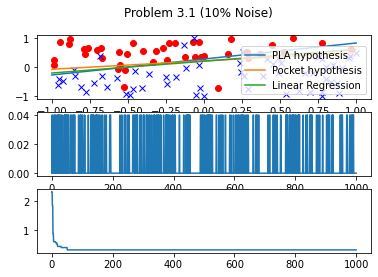

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#Pocket perceptron training function
def pocket_train(X, Y, w):
    f_list = []
    e_in_list = []
    best_val = 100

    f = np.random.uniform(-1, 1, size = (d + 1))


    for i in range(1000):
        adjust_index = []
        e_in_sum = 0

        Z = np.sign(np.dot(X,f))
        for j in range(len(X)):
            if Y[j] != Z[j]:
                adjust_index.append(j)
                e_in_sum += ((Z[j] - Y[j]) ** 2)
        e_in = e_in_sum / 100

        if i == 0:
            best_val = e_in
            best_index = 0

        f_list.append(f)
        e_in_list.append(best_val)
        f = f + np.dot(X[adjust_index[0],:], Y[adjust_index[0]])

        if e_in < best_val:
            best_val = e_in
            best_index = i

    return(f_list[best_index], e_in_list)


#Linear perceptron training function
def pla_train(X, Y, w):

    e_in_list = []
    e_in_sum = 0
    f = np.random.uniform(-1, 1, size = (d + 1))

    for i in range(1000):
        e_in_sum = 0
        e_in = 0
        Z = np.sign(np.dot(X,f))

        j = np.random.randint(0, 100, 1)
        if Y[j[0]] != Z[j[0]]:
            e_in_sum += ((Z[j[0]] - Y[j[0]]) ** 2)
            e_in = e_in_sum / 100
            f = f + np.dot(X[j[0],:], Y[j[0]])


        e_in_list.append(e_in)

    return (f, e_in_list)

#Starter Code from HW1
N = 100
d = 2

fig, axs = plt.subplots(3)

#Generate random target function: f(x) = w^Tx
w = np.random.uniform(-1, 1, size = (d + 1))

# Generate random training data
X = np.random.uniform(-1, 1, size = (N, d+1))
X[:,0] = 1

#Compute true labels for the training data
Y = np.sign(np.dot(X,w))

#Pick ten random points and subvert their values (noise)
rand_index = np.random.randint(0, 100, 10)
Y[rand_index[0]] = Y[rand_index[0]] * -1
Y[rand_index[1]] = Y[rand_index[1]] * -1
Y[rand_index[2]] = Y[rand_index[2]] * -1
Y[rand_index[3]] = Y[rand_index[3]] * -1
Y[rand_index[4]] = Y[rand_index[4]] * -1
Y[rand_index[5]] = Y[rand_index[5]] * -1
Y[rand_index[6]] = Y[rand_index[6]] * -1
Y[rand_index[7]] = Y[rand_index[7]] * -1
Y[rand_index[8]] = Y[rand_index[8]] * -1
Y[rand_index[9]] = Y[rand_index[9]] * -1

ind_pos = np.where(Y==1)[0] #positive examples
ind_neg = np.where(Y==-1)[0] #negative examples

#Plot points
axs[0].plot(X[ind_pos, 1], X[ind_pos, 2], 'ro')
axs[0].plot(X[ind_neg, 1], X[ind_neg, 2], 'bx')

#Run PLA 1000 times
pocket_result = pocket_train(X, Y, w)
pla_result = pla_train(X, Y, w)

f = pla_result[0]
f2 = pocket_result[0]
e_in_list = pla_result[1]
e_in_list2 = pocket_result[1]


x = np.linspace(-1, 1, 100)
f_y = -(f[0]/f[2]) + (-(f[1] * x)/f[2])
f_y2 = -(f2[0]/f2[2]) + (-(f2[1] * x)/f2[2])
axs[0].plot(x, f_y, label='PLA hypothesis')
axs[0].plot(x, f_y2, label='Pocket hypothesis')
axs[0].legend()

#Plot specs
fig.suptitle('Problem 3.1 (10% Noise)')

e_in_x = np.linspace(0, 1000, 1000)
axs[1].plot(e_in_x, e_in_list)
axs[2].plot(e_in_x, e_in_list2)

Xdag = np.matmul(np.linalg.pinv(np.matmul(X.transpose(), X)), X.transpose())
f3 = np.matmul(Xdag, Y)
f_y3 = -(f3[0]/f3[2]) + (-(f3[1] * x)/f3[2])
axs[0].plot(x, f_y3, label='Linear Regression')

axs[0].legend()
plt.show()